In [1]:
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import knn

In [2]:
data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Best fixed h: 0.3, Min LOO risk: 0.0333
Best k for fixed h: 14
Best k for non-fixed h: 15


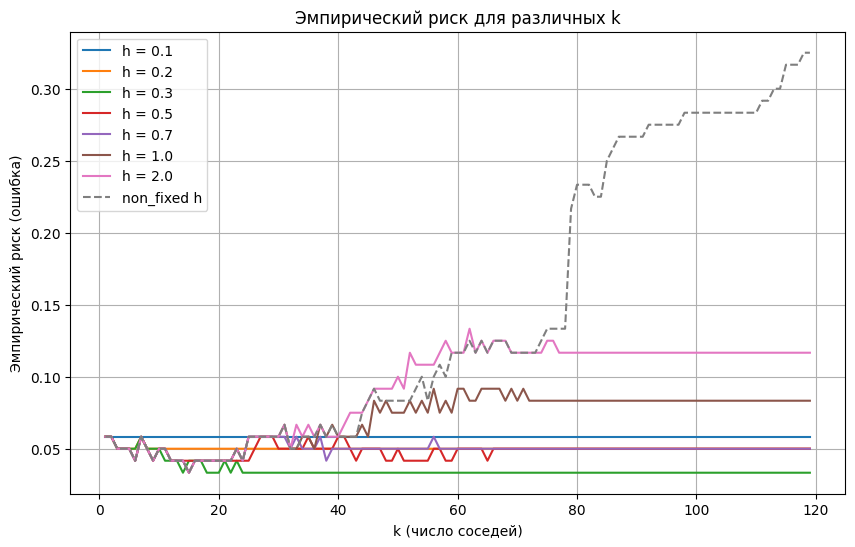

In [3]:
h_values = [0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 2.0] 
min_risk = 1.0
best_k = 1
best_h = None

plt.figure(figsize=(10, 6))

for h in h_values:
    best_k_h, risks = knn.loo_knn_parzen(X_train, y_train, h)
    plt.plot(range(1, len(risks) + 1), risks, label=f"h = {h}")
    if min(risks) < min_risk:
        min_risk = min(risks)
        best_h = h
        best_k = best_k_h

best_k_non_fixed, risks_non_fixed = knn.loo_knn_parzen(X_train, y_train, bandwidth=None)
plt.plot(range(1, len(risks_non_fixed) + 1), risks_non_fixed, label=f"non_fixed h", linestyle="--")

print(f"Best fixed h: {best_h}, Min LOO risk: {min_risk:.4f}")
print(f"Best k for fixed h: {best_k}")
print(f"Best k for non-fixed h: {best_k_non_fixed}")

plt.xlabel("k (число соседей)")
plt.ylabel("Эмпирический риск (ошибка)")
plt.title("Эмпирический риск для различных k")
plt.legend()
plt.grid()
plt.show()

In [4]:
start_time = time.time()
y_pred = knn.knn_parzen(X_train, y_train, X_test, best_k, bandwidth=None)
end_time = time.time()
test_accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred, target_names=data.target_names)
print(f"Test Accuracy: {test_accuracy}")
print(f"Время работы алгоритма: {end_time - start_time:.4f} секунд")
print("Отчет о классификации:")
print(report)

Test Accuracy: 1.0
Время работы алгоритма: 0.0010 секунд
Отчет о классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [5]:
# Инициализируем KNN
knn = KNeighborsClassifier(n_neighbors=best_k)

# Засекаем время работы
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()

# Делаем предсказания
y_pred = knn.predict(X_test)

# Оцениваем метрики
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=data.target_names)

# Выводим результаты
print(f"Время работы алгоритма: {end_time - start_time:.4f} секунд")
print(f"Точность: {accuracy:.4f}")
print("Отчет о классификации:")
print(report)


Время работы алгоритма: 0.0014 секунд
Точность: 1.0000
Отчет о классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

